In [56]:
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import StandardScaler
import GPy

In [57]:
os.chdir('/home/saumya/Documents/Flame_dianostics-temperature_profile_estimation_using_ML-main/spec_data/New_final')

In [58]:
x_dat = np.load('ABS_noisy_SNR_new.npy').astype(np.half)
# x_dat = np.reshape(x_dat, -1)[:, None]

In [59]:
x_dat.shape

(12500, 3000)

In [60]:
x_dat

array([[3.600e-05, 3.844e-05, 2.837e-05, ..., 4.733e-05, 5.478e-05,
        4.387e-05],
       [2.068e-05, 2.652e-05, 2.497e-05, ..., 6.682e-05, 7.761e-05,
        5.633e-05],
       [1.049e-05, 4.423e-05, 2.927e-05, ..., 7.147e-05, 1.000e-04,
        7.272e-05],
       ...,
       [9.294e-04, 7.172e-04, 2.909e-05, ..., 7.749e-04, 3.695e-04,
        5.455e-04],
       [2.177e-04, 8.788e-04, 4.585e-04, ..., 5.589e-04, 7.362e-04,
        8.240e-04],
       [8.302e-04, 3.266e-04, 6.490e-04, ..., 9.861e-04, 4.880e-04,
        7.000e-04]], dtype=float16)

In [61]:
os.chdir('/home/saumya/Documents/data/snr')

In [62]:
y_dat_std = np.load('param_SNR.npy')

# y_dat = np.reshape(y_dat, -1)[:, None]

# y_dat = y_dat[:10000]

In [63]:
y_dat_std.shape

(12500, 3)

In [64]:
y_dat_transform = StandardScaler().fit(y_dat_std)

In [90]:
import pickle 

import pickle
with open('y_d_T.pkl', 'wb') as file:
    pickle.dump(y_dat_transform, file)

In [65]:
y_dat = y_dat_transform.transform(y_dat_std)

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
def train_val_test_split(X, y, val_size):
    # test_size = 1 - train_size - val_size
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = val_size)
    # relative_train_size = train_size / (val_size + train_size)
    # X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                                    #   train_size = relative_train_size, test_size = 1-relative_train_size)
    return X_train_val, X_test, y_train_val, y_test

In [68]:
X_train, X_test, Y_train, Y_test = train_val_test_split(x_dat, y_dat, .2)

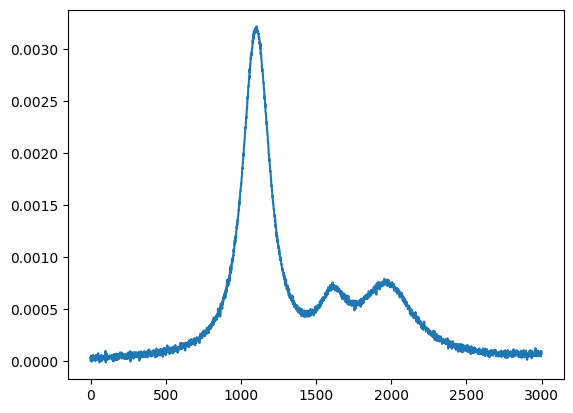

In [69]:
plt.plot(x_dat[2])

In [70]:
# LMC set up
ks = [GPy.kern.RBF(np.shape(X_train)[1]) for i in range(1)]
icm = GPy.util.multioutput.LCM(input_dim=np.shape(X_train)[1],num_outputs=1,kernels_list=ks)

In [71]:
print(icm)
# print('W matrix\n',icm.B.W)
# print('\nkappa vector\n',icm.B.kappa)
# print('\nB matrix\n',icm.B.B)

  ICM0.            |          value  |  constraints  |  priors
  rbf.variance     |            1.0  |      +ve      |        
  rbf.lengthscale  |            1.0  |      +ve      |        
  B.W              |  [-0.68419873]  |               |        
  B.kappa          |            0.5  |      +ve      |        


In [72]:
[Y_train[:,:-1], Y_train[:,-1]]

[array([[ 7.983e-01, -2.747e-04],
        [-5.889e-01, -2.747e-04],
        [-6.572e-01,  7.070e-01],
        ...,
        [-7.280e-01, -7.070e-01],
        [ 5.889e-01, -2.747e-04],
        [ 8.667e-01,  1.415e+00]], dtype=float16),
 array([-1.213 , -1.352 ,  1.628 , ..., -0.1736, -1.559 ,  0.7275],
       dtype=float16)]

In [73]:
# m = GPy.models.GPCoregionalizedRegression([X_train, X_train, X_train],[np.reshape(Y_train[:, 0], -1)[:, None], np.reshape(Y_train[:, 1], -1)[:, None], np.reshape(Y_train[:, 2], -1)[:, None]],kernel=icm)


In [74]:
m = GPy.models.GPCoregionalizedRegression([X_train],[Y_train],kernel=icm)
m['.*rbf.var'].constrain_fixed(1.)
# constrain if converge to reasonless extrema
# m['mixed_noise.Gaussian_noise_0.variance'].constrain_bounded(0,1e-5)
# m['mixed_noise.Gaussian_noise_1.variance'].constrain_bounded(0,1e-5)
# m['mixed_noise.Gaussian_noise_2.variance'].constrain_bounded(0,1e-5)
print(m)


Name : gp
Objective : 37779.972113157346
Number of Parameters : 5
Number of Optimization Parameters : 4
Updates : True
Parameters:
  gp.                                    |          value  |  constraints  |  priors
  ICM0.rbf.variance                      |            1.0  |   +ve fixed   |        
  ICM0.rbf.lengthscale                   |            1.0  |      +ve      |        
  ICM0.B.W                               |  [-0.68419873]  |               |        
  ICM0.B.kappa                           |            0.5  |      +ve      |        
  mixed_noise.Gaussian_noise_0.variance  |            1.0  |      +ve      |        


In [75]:
# print('W matrix\n',icm.B.W)
# print('\nkappa vector\n',icm.B.kappa)

In [76]:
m.optimize(messages=True)

In [89]:
import pickle

import pickle
with open('gpr_LMC.pkl', 'wb') as file:
    pickle.dump(m, file)

In [77]:
print(m)
# print('W matrix\n',icm.B.W)
# print('\nkappa vector\n',icm.B.kappa)
# print('\nB matrix\n',icm.B.B)


Name : gp
Objective : 30088.51881956566
Number of Parameters : 5
Number of Optimization Parameters : 4
Updates : True
Parameters:
  gp.                                    |                value  |  constraints  |  priors
  ICM0.rbf.variance                      |                  1.0  |   +ve fixed   |        
  ICM0.rbf.lengthscale                   |  0.05052112322002514  |      +ve      |        
  ICM0.B.W                               |        [-1.81405679]  |               |        
  ICM0.B.kappa                           |   0.7083734528089006  |      +ve      |        
  mixed_noise.Gaussian_noise_0.variance  |   0.3816568327641833  |      +ve      |        


In [78]:
newX = X_test

In [79]:
newX = np.concatenate((newX,np.zeros((np.shape(X_test)[0],1))),1)
noise_dict = {'output_index':newX[:,-1].astype(int)}
ys,var=m.predict(newX,Y_metadata=noise_dict)

# Temper_test_=scalerT.inverse_transform(ys)


In [80]:
ys

array([[ 1.36369518e+00, -7.16169191e-02, -7.50198621e-01],
       [ 4.70943806e-01, -6.85409949e-02, -1.33385640e+00],
       [-3.81799230e-01, -1.41299058e-03, -1.03159752e+00],
       ...,
       [ 1.37211996e+00, -1.20428321e-02,  7.54754204e-03],
       [ 1.57824361e-01, -1.09624035e-02,  2.50933593e-01],
       [-1.59848841e+00,  2.79346041e-02,  8.34826600e-01]])

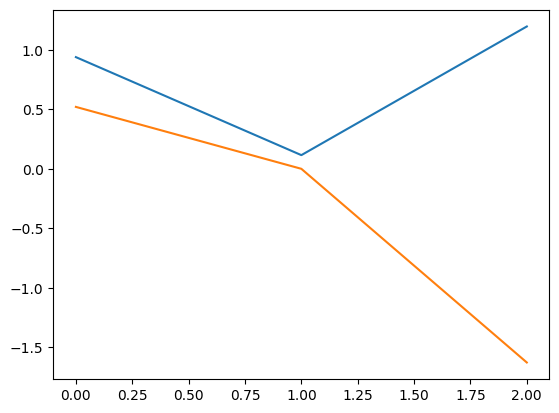

In [81]:
plt.plot(ys[1030])

plt.plot(Y_train[1030])

In [82]:
ys

array([[ 1.36369518e+00, -7.16169191e-02, -7.50198621e-01],
       [ 4.70943806e-01, -6.85409949e-02, -1.33385640e+00],
       [-3.81799230e-01, -1.41299058e-03, -1.03159752e+00],
       ...,
       [ 1.37211996e+00, -1.20428321e-02,  7.54754204e-03],
       [ 1.57824361e-01, -1.09624035e-02,  2.50933593e-01],
       [-1.59848841e+00,  2.79346041e-02,  8.34826600e-01]])

In [83]:
Y_test

array([[ 1.488e+00,  7.070e-01, -7.969e-01],
       [ 3.828e-01, -2.747e-04, -1.213e+00],
       [-5.200e-01,  7.070e-01, -1.352e+00],
       ...,
       [ 1.351e+00, -7.070e-01,  3.479e-02],
       [ 1.733e-01,  1.415e+00,  1.736e-01],
       [-1.351e+00,  1.415e+00,  1.351e+00]], dtype=float16)

In [84]:
from sklearn import metrics

In [85]:
conc_1 = metrics.mean_squared_error(np.array(ys[:, 1]), np.array(Y_test[:, 1]))
print(f'The mean squared error between the real and predicted values are: {conc_1}')

The mean squared error between the real and predicted values are: 1.0027522536125373


In [86]:
conc_1 = metrics.mean_squared_error(np.array(ys[:, 2]), np.array(Y_test[:, 2]))
print(f'The mean squared error between the real and predicted values are: {conc_1}')

The mean squared error between the real and predicted values are: 0.13140169817936315


In [87]:
conc_1 = metrics.mean_squared_error(np.array(ys[:, 0]), np.array(Y_test[:, 0]))
print(f'The mean squared error between the real and predicted values are: {conc_1}')

The mean squared error between the real and predicted values are: 0.0757383066245392


In [88]:
metrics.mean_squared_error(ys, Y_test)

0.40329741947214726